# Introducción al uso de Python para sistemas de control

## Tabla comparativa de comandos entre MATLAB y Python

Observamos que se requieren las librerías `numpy`, `matplotlib.pyplot` y `scipy.signal`. Podemos usar `control` como alternativa ya que se tiene <a href="https://python-control.readthedocs.io/_/downloads/en/0.8.4/pdf/#page=95&zoom=100,96,96">Módulo de Compatibilidad MATLAB</a> accediendo con `control.matlab` (los comandos tendran un comportamiento similar). Para ver todas las dependencias necesarias, puede ver el archivo `requirements.txt`.

Tener en cuenta que control utiliza la librería `numpy` y `scipy`. Y en algunas ocaciones será necesario acudir directamente a ellas. Trataremos de realizar una transferencia clara al momento de importar las librerías para utilizar los comandos similares a MATLAB.

Un problema que enfrentaremos, es que en MATLAB se admite la separación de elementos de un arreglo con espacio, que en Python no está permitido (sólo con ','), lo que producirá un error. Además, respecto a la presentación por pantalla, MATLAB utiliza ';' para indicar si se debe mostrar o no la variable por la terminal, en Python será considerado un error de sintaxis.

| MATLAB Command | Python Equivalent             | Equivalente en Python (control)  |
|----------------|-------------------------------|----------------------------------|
| exp            | numpy.exp                     |                 -                |
| sin            | numpy.sin                     |                 -                |
| cos            | numpy.cos                     |                 -                |
| sinh           | numpy.sinh                    |                 -                |
| cosh           | numpy.cosh                    |                 -                |
| clf            | matplotlib.pyplot.clf         |                 -                |
| plot           | matplotlib.pyplot.plot        |                 -                |
| subplot        | matplotlib.pyplot.subplot     |                 -                |
| hold           | matplotlib.pyplot.hold        |                 -                |
| title          | matplotlib.pyplot.title       |                 -                |
| xlabel         | matplotlib.pyplot.xlabel      |                 -                |
| ylabel         | matplotlib.pyplot.ylabel      |                 -                |
| text           | matplotlib.pyplot.text        |                 -                |
| print          | matplotlib.pyplot.savefig     |                 -                |
| figure         | matplotlib.pyplot.figure      |                 -                |
| impulse        | scipy.signal.impulse          | control.matlab.impulse           |
| step           | scipy.signal.step             | control.matlab.step              |
| tf             | scipy.signal.TransferFunction | control.tf                       |
| zpk            | scipy.signal.zpk2tf           | control.matlab.zpk2tf            |
| ss2tf          | scipy.signal.ss2tf            | control.matlab.ss2tf             |
| tf2zp          | scipy.signal.tf2zpk           | control.matlab.tf2zpk            |
| ss2zp          | scipy.signal.ss2zpk           | control.matlab.ss2zpk            |
| zp2tf          | scipy.signal.zpk2tf           | control.matlab.zpk2tf            |
| tf2ss          | scipy.signal.tf2ss            | control.matlab.tf2ss             |
| zp2ss          | scipy.signal.zpk2ss           | control.matlab.zpk2ss            |
| bode           | scipy.signal.bode             | control.bode                     |
| nyquist        | scipy.signal.nyquist          | control.nyquist                  |
| margin         | -                             | control.margin                   |
| rlocus         | -                             | control.rlocus                   |
| lsim           | scipy.signal.lsim             | control.matlab.lsim              |
| c2d            | scipy.signal.cont2discrete    | control.matlab.c2d               |
| pzmap          | -                             | control.pzmap                    |

## Importar librerías

In [1]:
# Import commands similar to the original code in MATLAB
from numpy import poly, roots
from numpy import convolve as conv
from scipy.signal import residue
from control.matlab import tf, tf2zpk, zpk2tf, pzmap, feedback, series, parallel, impulse, step
from matplotlib.pyplot import plot, show, grid, title, xlabel, ylabel, legend, xlim, ylim, subplot, figure

## Raı́ces de un polinomio

### Obtención de las raíces
Supongamos el siguiente polinomio $P = s^4 + 4s^3 + 4s^2 + s +20$. Ingresaremos el polinomio como vector:

##### MATLAB
```MATLAB
% Definir los coeficientes del polinomio
P = [1 4 4 1 20]; % Coeficientes de s^4 + 4s^3 + 4s^2 + s + 20

% Calcular las raíces del polinomio
raices = roots(P)
```

##### Python

In [2]:
# Definir los coeficientes del polinomio
p = [1, 4, 4, 1, 20]  # Coeficientes de s^4 + 4s^3 + 4s^2 + s + 20

# Calcular las raíces del polinomio
r = roots(p)

# Mostrar las raíces
print("Las raíces del polinomio son:", r)

Las raíces del polinomio son: [-2.65449206+1.25946028j -2.65449206-1.25946028j  0.65449206+1.37420805j
  0.65449206-1.37420805j]


### Obtención de los coeficientes
A partir de las raíces, obtenemos el polinomio.

##### MATLAB
```MATLAB
% Definir las raíces del polinomio
raices = [-2, -1 + 2j, -1 - 2j, -3]; % Ejemplo de raíces

% Calcular los coeficientes del polinomio
P = poly(raices)
```

##### Python

In [3]:
# Definir las raíces del polinomio
raices = [-2.65449206+1.25946028j, -2.65449206-1.25946028j,
           0.65449206+1.37420805j,  0.65449206-1.37420805j]

# Calcular los coeficientes del polinomio
p = poly(raices)

# Mostrar los coeficientes del polinomio
print("Los coeficientes del polinomio son:", p)

Los coeficientes del polinomio son: [ 1.          4.          4.00000001  1.00000006 20.00000001]


## Función de Transferencia

Supongamos la función de transferencia:
$$G(s) = \frac{5s + 20}{s^2 + 4s + 20}$$
si sacamos factor común y factorizamos:
$$G(s) = \frac{5(s + 4)}{(s + 2 - 4j)(s + 2 + 4j)}$$

### Ingresar al Código

##### MATLAB
Para ingresar en MATLAB la función de transferencia, lo hacemos de la siguiente manera:
```MATLAB
% Definir los coeficientes del numerador y denominador
num = [5, 20];
den = [1, 4, 20];

% Crear la función de transferencia
G = tf(num, den)
```

##### Python

In [4]:
# Definir los coeficientes del numerador y denominador
num = [5, 20]
den = [1, 4, 20]

# Crear la función de transferencia
G = tf(num, den)

# Mostrar la función de transferencia
print(G)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   5 s + 20
--------------
s^2 + 4 s + 20



### Ceros, polos y ganancia
#### Obtención de ceros, polos y ganancia

##### MATLAB
```MATLAB
% Obtener ceros, polos y ganancia
[z, p, k] = tf2zp(num, den)
```

##### Python

In [5]:
z, p, k = tf2zpk(num, den)
print("Ceros: ", z)
print("Polos: ", p)
print("Ganancia: ", k)

Ceros:  [-4.]
Polos:  [-2.+4.j -2.-4.j]
Ganancia:  5.0


#### Obtención de la Función de Transferencia

##### MATLAB
```MATLAB
% Definir los ceros, polos y ganancia
z = -4; % Cero
p = [-2 + 4j, -2 - 4j]; % Polos
k = 5; % Ganancia

% Obtener función de transferencia
G = zpk(z, p, k)

% Obtener los coeficientes del numerador y denominador
[num, den] = zp2tf(z, p, k)
```

##### Python

In [6]:
# Definir los ceros, polos y ganancia
z = [-4]  # Ceros
p = [-2 + 4j, -2 - 4j]  # Polos
k = 5  # Ganancia

# Obtener los coeficientes del numerador y denominador
num, den = zpk2tf(z, p, k)

# Crear la función de transferencia
G = tf(num, den)

# Mostrar los resultados
print("Numerador: ", num)
print("Denominador: ", den)
print(G)

Numerador:  [ 5. 20.]
Denominador:  [ 1.  4. 20.]
<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   5 s + 20
--------------
s^2 + 4 s + 20



#### Diagrama de polos y ceros

##### MATLAB
```MATLAB
% Definir los ceros, polos y ganancia
z = -4; % Cero
p = [-2 + 4j, -2 - 4j]; % Polos
k = 5; % Ganancia

% Obtener función de transferencia
G = zpk(z, p, k)

% Graficar diagrama de polos y ceros
pzmap(G)
grid
```

##### Python

e:\UTN\Sistemas de Control\Python as MATLAB\env\control-systems\Lib\site-packages\control\pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


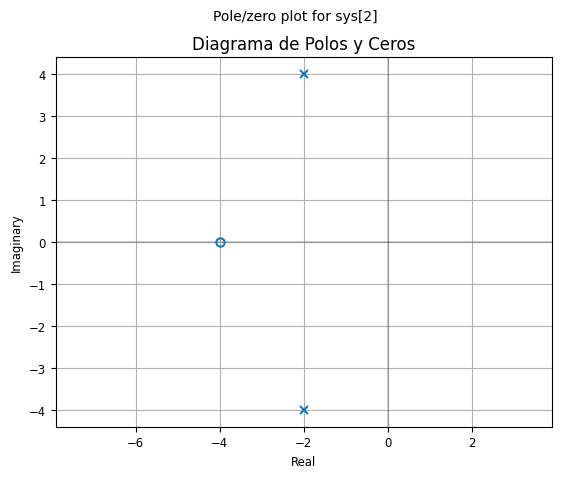

In [7]:
# Definir los ceros, polos y ganancia
z = [-4]  # Ceros
p = [-2 + 4j, -2 - 4j]  # Polos
k = 5  # Ganancia

# Obtener los coeficientes del numerador y denominador
num, den = zpk2tf(z, p, k)

# Crear la función de transferencia
G = tf(num, den)

# Graficar diagrama de polos y ceros
pzmap(G, plot=True)
title('Diagrama de Polos y Ceros')
grid()

### Desarrollo en fracciones simples
Supongamos otra función transferencia:
$$G(s) = \frac{16s + 16}{(s + 2)(s + 4)}$$
y que
$$R(s) = \frac{1}{s}$$

Como las raı́ces del denominador sor reales y distintas, el método de desarrollo en fracciones simples nos permite escribir a $G_{(s)} x R_{(s)}$ de la siguiente manera:
$$\frac{16s + 16}{s(s + 2)(s + 4)} = \frac{A}{s} + \frac{B}{s+2} \frac{C}{s+4}$$

Para calcular los valores de A, B y C lo hacemos mediante la fórmula de residuos, en general, estos cálculos pueden tornarse muy complicados de realizar "a mano". Podemos realizar estos cálculos de la siguiente manera:

##### MATLAB
```MATLAB
% Numerador y denominador de la función transferencia
num = [16, 16]; % Coeficientes del polinomio del numerador (16s + 16)
den = conv([1, 0], conv([1, 2], [1, 4])); % Producto de (s)(s+2)(s+4)

% Desarrollo en fracciones simples
[A, p, ~] = residue(num, den) % Descartamos el término constante
```

##### Python

In [8]:
# Numerador y denominador de la función transferencia
num = [16, 16]  # Coeficientes del numerador (16s + 16)
den = conv([1, 0], conv([1, 2], [1, 4]))  # Coeficientes del denominador (s^2 + 6s + 8)

# Desarrollo en fracciones simples
res, p, _ = residue(num, den)  # '_' descarta el término constante si no es necesario

# Mostrar los resultados
print("Residuos (A, B, C):", res)
print("Polos:", p)

Residuos (A, B, C): [ 2.  4. -6.]
Polos: [ 0. -2. -4.]


#### Término constante
Si la función transferencia resulta ser _propia_, es decir que el grado del numerador es igual al del denominador, podemos añadir una parámetro más al argumento del lado izquierdo, que lo podemos llamar k. 
Supongamos que queremos hallar f (t) siendo:
$$F(s) = \frac{2s^3 + 5s^2 + 3s + 6}{s^3 + 6s^2 + 11s + 6} \Rightarrow f(t) = \mathcal{L}^{-1}\{F(s)\}$$

##### MATLAB
```MATLAB
% Numerador y denominador de la función transferencia
num = [2, 5, 3, 6]; % Polinomio numerador
den = [1, 6, 11, 6]; % Polinomio denominador

% Desarrollo en fracciones simples
[A, p, k] = residue(num, den)
```

##### Python

In [9]:
# Numerador y denominador de la función transferencia
num = [2, 5, 3, 6]
den = [1, 6, 11, 6]

# Desarrollo en fracciones simples
res, p, k = residue(num, den)

# Mostrar los resultados
print("Residuos (A, B, C):", res)
print("Polos:", p)
print("Ganancia:", k)

Residuos (A, B, C): [ 3. -4. -6.]
Polos: [-1. -2. -3.]
Ganancia: [2.]


### Diagrama de Bloques

$G_1 (s) = 0.4$, $G_2 (s) = \frac{100}{s(s+2)}$, $H_2 (s) = \frac{s}{s+20}$, $H_1 (s) = 1$. Pretendemos hallar $G(s) = \frac{Y(s)}{R(s)}$ a lazo cerrado.

<div style="text-align: center;">
    <img src="./Fig1-Diagrama de bloques.png" alt="Fig1"/>
</div>

Podemos reducir el sistema a la siguiente función de transferencia:
$$G(s) = \frac{40s + 800}{s^3 + 22s^2 + 180s + 800}$$

##### MATLAB
```MATLAB
% Definimos cada bloque
G1 = tf([.4])
G2 = tf([100], conv([1, 0], [1, 2]))
H1 = tf([1])
H2 = tf([1, 0], [1, 20])

% Comenzamos a describir el diagrama
% Resolvemos la realimentación entre G2 y H2
sys1 = feedback(G2, H2, -1) % realimentación negativa
% Luego, G1 en serie con sys1
sys2 = series(G1, sys1)
% Y finalmente, la realimentación global
G = feedback(sys2, H1, -1) % realimentación negativa
```

##### Python

In [10]:
# Definimos cada bloque
G1 = tf([0.4], [1])
G2 = tf([100], [1, 2, 0])  # conv([1, 0], [1, 2]) equivale a [1, 2, 0]
H1 = tf([1], [1])
H2 = tf([1, 0], [1, 20])

# Comenzamos a describir el diagrama
# Resolvemos la realimentación entre G2 y H2
sys1 = feedback(G2, H2, sign=-1)  # realimentación negativa
# Luego, G1 en serie con sys1
sys2 = series(G1, sys1)
# Y finalmente, la realimentación global
G = feedback(sys2, H1, sign=-1)  # realimentación negativa

# Imprimimos el resultado
print("Función de transferencia G:")
print(G)

Función de transferencia G:
<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        40 s + 800
--------------------------
s^3 + 22 s^2 + 180 s + 800



## Respuesta al Impulso
Supongamos que tenemos una función transferencia de la siguiente forma:
$$Y(s) = \frac{1}{(s+1)(s+2)}$$

Si calculamos ahora la antitransformada resulta que $y(t) = e^{−t} − e^{−2t}$.

Ingresamos los vectores numerador y denominador y luego ejecutemos el comando:

##### MATLAB
```MATLAB
% Definimos la función de transferencia
Y = tf([1], conv([1, 1], [1, 2]))

% Obtenemos la respuesta al impulso
impulse(Y)
grid
```

##### Python

<TransferFunction>: sys[10]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      1
-------------
s^2 + 3 s + 2



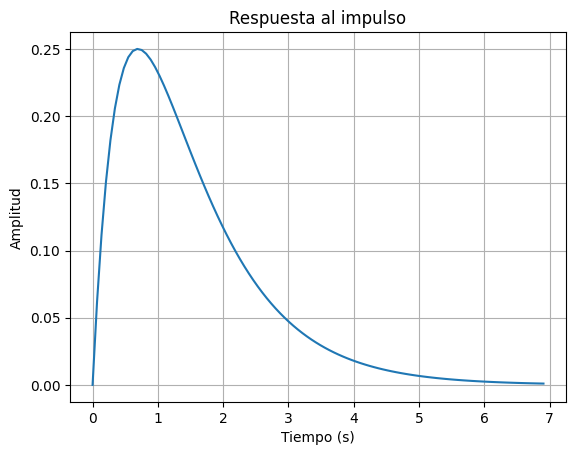

In [11]:
# Definimos la función de transferencia
Y = tf([1], conv([1, 1], [1, 2]))
print(Y)

# Obtenemos la respuesta al impulso
y, t = impulse(Y)   # y es la respuesta al impulso, t es el tiempo

# Graficamos la respuesta al impulso
plot(t, y)
title('Respuesta al impulso')
xlabel('Tiempo (s)')
ylabel('Amplitud')
grid()

## Respuesta al Escalón unitario
Calculemos la respuesta al escalón unitario de la función transferencia:
$$G(s) = \frac{Y(s)}{R(s)} = \frac{4}{s^2 + 0.8s + 4}$$

##### MATLAB
```MATLAB
% Definimos la función de transferencia
G = tf([4], [1, .8, 4])

% Obtenemos la respuesta al escalón
step(G)
grid
```

##### Python

<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
---------------
s^2 + 0.8 s + 4



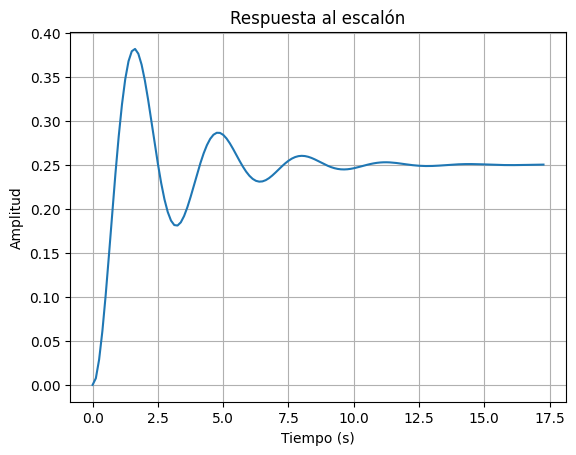

In [12]:
# Definimos la función de transferencia
G = tf([1], [1, .8, 4])
print(G)

# Obtenemos la respuesta al escalón
y, t = step(G)   # y es la respuesta al escalón, t es el tiempo

# Graficamos la respuesta al escalón
plot(t, y)
title('Respuesta al escalón')
xlabel('Tiempo (s)')
ylabel('Amplitud')
grid()

## Respuesta a la Rampa Unitaria
Para una entrada rampa unitaria no existe una función predefinida, por lo que veremos cómo con el comando step podemos obtener
una rampa. Si seguimos con el ejemplo anterior y excitamos al sistema con $r(t) = t$, es decir que $R(s) = \frac{1}{s^2}$ , tenemos lo siguiente:
$$Y(s) = (\frac{4}{s^2 + 0.8s + 4}) \frac{1}{s^2} \Rightarrow Y(s) = (\frac{4}{s^3 + 0.8s^2 + 4s}) \frac{1}{s}$$

Por lo que utilizando como denominador de la función transferencia al polinomio $s^3 +0.8s^2 + 4s$, y calculando la respuesta al escalón unitario, otenemos la respuesta a la rampa unitaria.

##### MATLAB
```MATLAB
% Definimos la función de transferencia
Y = tf([4], [1, .8, 4, 0])

% Obtenemos la respuesta a la rampa
step(Y)
grid
title("Ramp Response")
xlim([0, 25])
ylim([0, 25])
```

##### Python

<TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         4
-------------------
s^3 + 0.8 s^2 + 4 s



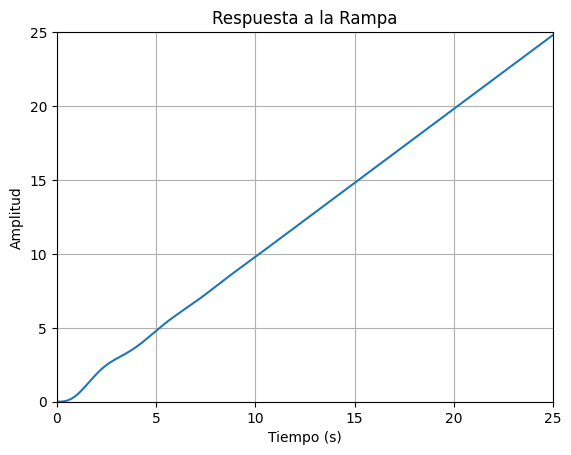

In [13]:
# Definimos la función de transferencia
Y = tf([4], [1, .8, 4, 0])
print(Y)

# Obtenemos la respuesta al escalón
y, t = step(Y)   # y es la respuesta al escalón, t es el tiempo

# Graficamos la respuesta al escalón
plot(t, y)
title('Respuesta a la Rampa')
xlabel('Tiempo (s)')
ylabel('Amplitud')
xlim([0, 25])
ylim([0, 25])
grid()